In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Load the dataset
df = pd.read_csv('/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv', names=['userId', 'productId', 'rating', 'timestamp'])

df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [10]:
df.describe()['rating'].T

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [12]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(df.rating.min()))
print('Maximum rating is: %d' %(df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


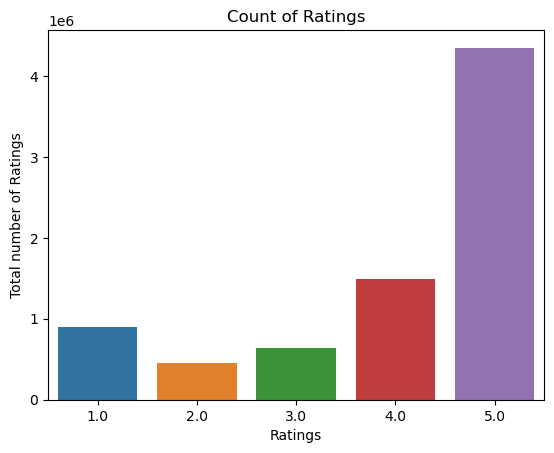

In [24]:
# Check the distribution of the rating

sns.countplot(x='rating',data=df)

# Set the title and axis labels
plt.title('Count of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Total number of Ratings')

# Show the plot
plt.show()

In [28]:
# unique users and products
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userId )))
print("Total No of products  :", len(np.unique(df.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 7824482
Total No of Users   : 4201696
Total No of products  : 476002


In [ ]:
# Preprocess the data
df = df.dropna() # Remove any missing values
df = df.drop_duplicates(['userId', 'productId']) # Remove duplicates
df = df[['userId', 'productId', 'rating']] # Keep relevant columns

In [ ]:
# Create the Reader object
reader = Reader(rating_scale=(1, 5))

In [ ]:
# Load the data into the Dataset object
data = Dataset.load_from_df(df, reader)

In [ ]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

In [ ]:
# Build the recommendation model using Singular Value Decomposition (SVD)
algo = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.4)


In [ ]:
# Train the model on the training set
algo.fit(trainset)


In [ ]:
# Evaluate the model on the testing set
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)

In [9]:
# Make recommendations for a given user
user_id = 'A3BXHA5BATHYI4'
user_items = df[df['userId'] == user_id]['productId']
user_unseen_items = df[~df['productId'].isin(user_items)]['productId']
user_unseen_items = user_unseen_items.drop_duplicates()
user_unseen_items = list(user_unseen_items)

user_ratings = []
for item in user_unseen_items:
    user_ratings.append((user_id, item, 4.0)) # Assign a default rating of 4.0

user_ratings = pd.DataFrame(user_ratings, columns=['userId', 'productId', 'rating'])
user_data = Dataset.load_from_df(user_ratings[['userId', 'productId', 'rating']], reader)
user_testset = user_data.build_full_trainset().build_testset()
user_predictions = algo.test(user_testset)

# Get top recommended items
top_n = 5
recommended_items = []
for uid, iid, true_r, est, _ in user_predictions:
    recommended_items.append((iid, est))

recommended_items = sorted(recommended_items, key=lambda x: x[1], reverse=True)[:top_n]
recommended_item_ids = [iid for iid, _ in recommended_items]

print(f'Top {top_n} recommended items for user {user_id}:')
print(recommended_item_ids)


RMSE: 1.2893
Top 5 recommended items for user A3BXHA5BATHYI4:
['B008X1C1DC', 'B00000JBHE', 'B000053HC5', 'B00GQDCMVA', 'B007WMOCW6']
